<a href="https://colab.research.google.com/github/Lud-lud/text_mining_sentiment_analysis_NLP/blob/main/text_mining_sentiment_analysis_portuguese_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lise de sentimentos de um produto vendido em e-commerce
Neste projeto, foram analisados os coment√°rios dos clientes de uma mochila vendida no Mercado Livre.

**An√°lise descritiva**

A partir de uma base de dados de coment√°rios dispon√≠vel no [Kaggle](https://www.kaggle.com/datasets/sampaiovitor/avaliaes-em-portugus-amazon-e-mercado-livre), foi realizada a extra√ß√£o dos tokens, a remo√ß√£o das stopwords e dos caracteres num√©ricos e a produ√ß√£o de nuvens de palavras e gr√°ficos para an√°lise da frequ√™ncia dos sentimentos positivos e negativos.

Al√©m disso, foi criado um √≠ndice para mensurar o sentimento geral dos clientes em rela√ß√£o ao produto.

A an√°lise descritiva √© √∫til para dar uma vis√£o geral dos sentimentos utilizando m√©todos simples.

**An√°lise preditiva**

A partir de bases de dados de coment√°rios de produtos no site Buscap√© dispon√≠veis neste [reposit√≥rio](https://github.com/lucasvbalves/nlp-pt-br-datasets?utm_source=chatgpt.com), foi treinado um modelo de classifica√ß√£o de coment√°rios baseado no algoritmo Naive-Bayes e um modelo Suport Vector Machine (SVM).

Com estes modelos, os coment√°rios sobre a mochila foram classificados e uma breve an√°lise da quantidade de acertos foi realizada.

A aplica√ß√£o deste algoritmo pode ser √∫til para filtragem de coment√°rios com base na polaridade. Tal estrat√©gia √© utilizada em grandes marketplaces, como a Amazon. Veja este exemplo para um hidratante corporal:
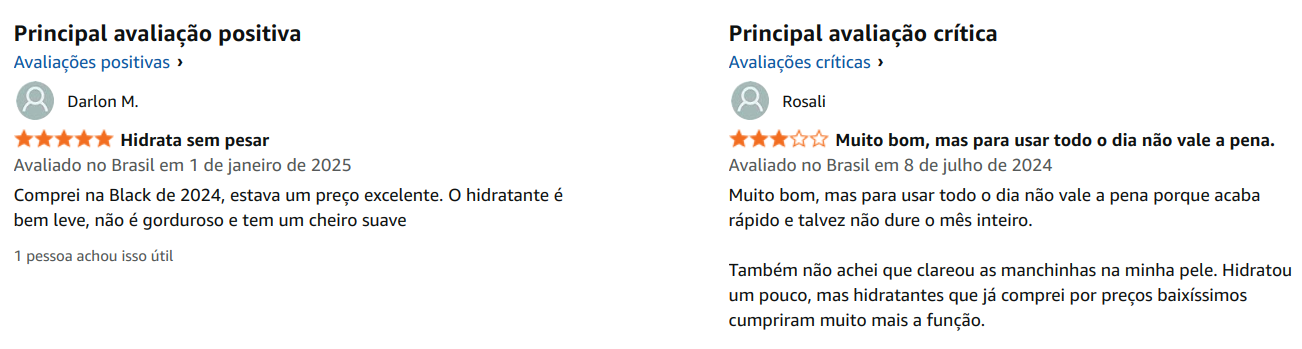

Veja o passo-a-passo abaixo:

In [1]:
install.packages("tidyverse") # Instalar pacote necess√°rio para a manipula√ß√£o dos dados
install.packages("tidytext") # Instalar pacote necess√°rio para criar tokens a partir dos coment√°rios
install.packages("stopwords") # Instalar pacote necess√°rio para criar tokens a partir dos coment√°rios
install.packages("wordcloud") # Instalar pacote necess√°rio para criar nuvem de palavras
install.packages("reshape2") # Instalar pacote que produz nuvem de palavras para diferentes categorias
install.packages("tm") # Instalar pacote que a cria√ß√£o do corpus para o modelo preditivo
install.packages("e1071") # Instalar pacote que treina o modelo Naive Bayes
install.packages("caret") # Instalar pacote que faz matriz de confus√£o

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòSnowballC‚Äô, ‚Äòjaneaustenr‚Äô, ‚Äòtokenizers‚Äô


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependency ‚ÄòISOcodes‚Äô


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependency ‚Äòplyr‚Äô


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòNLP‚Äô, ‚Äòslam‚Äô, ‚ÄòBH‚Äô


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependency ‚Äòproxy‚Äô


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚

In [2]:
# Carregar os pacotes necess√°rios
library("tidyverse")
library("tidytext")
library("stopwords")
library("wordcloud")
library("reshape2")
library("tm")
library("e1071")
library("caret")

‚îÄ‚îÄ Attaching core tidyverse packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 2.0.0 ‚îÄ‚îÄ
‚úî dplyr     1.1.4     ‚úî readr     2.1.5
‚úî forcats   1.0.0     ‚úî stringr   1.5.1
‚úî ggplot2   3.5.1     ‚úî tibble    3.2.1
‚úî lubridate 1.9.4     ‚úî tidyr     1.3.1
‚úî purrr     1.0.2     
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() masks stats::filter()
‚úñ dplyr::lag()    masks stats::lag()
‚Ñπ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: RColorBrewer


Attaching package: ‚Äòreshape2‚Äô


The following object is masked from ‚Äòpackage:tidyr‚Äô:

    smiths


Loading required package: NLP


Attaching package: ‚ÄòNLP‚Äô


The following object is masked from ‚Äòpackage:ggplot2‚Äô:

    annotate



Attaching package

In [3]:
# Obter os dados e visualizar as primeiras linhas da tabela
df <- read_csv('/content/ml_scrape_final.csv', show_col_types = FALSE)
head(df)

Pesquisa   Titulo                                                    
1 smartphone Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram
2 smartphone Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram
3 smartphone Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram
4 smartphone Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram
5 smartphone Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram
6 smartphone Smartphone Samsung Galaxy A14 Dual 6.6 128gb Preto 4gb Ram
  Link                                                                                                                                                                                                       
1 https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281
2 https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281
3 https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281
4 https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281
5 https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281
6 https://produto.mercadolivre.com.br/MLB-3315181641-smartphone-samsung-galaxy-a14-dual-66-128gb-preto-4gb-ram-_JM#position=46&search_layout=stack&type=item&tracking_id=4703b69b-1b0f-4cc2-b281-a641f81b3281
  Comentario                                                                                                                                       
1 A foto fica amarelada quando eu vou fotografar com celular.                                                                                      
2 üëèüèºüëèüèºüëèüèºüëèüèºüëèüèºüëèüèº.                                                                                                                        
3 Muito bom.                                                                                                                                       
4 Produto muito bom dei de presente pra meu filho ele t√° amando s√≥ esperava vir ao menos com o fone de ouvido mais n√£o veio mais do resto perfeito.
5 Recomendo.                                                                                                                                       
6 Maravilhoso, pot√™ncia perfeita em quest√£o do pre√ßo!.

In [4]:
# Verificar quantos produtos diferentes h√° na base de dados
df %>% summarize(n_produtos = n_distinct(Titulo))

n_produtos
1 896

In [5]:
# Verificar quais os produtos com maior n√∫mero de coment√°rios
freq <- df %>% count(Titulo) %>% arrange(desc(n))
head(freq, 5)

Titulo                                                       n  
1 Mochila Masculina Faculdade Imperme√°vel Resistente Grande    700
2 Umidificador De Ar Aromatizador Purificador Port√°til Led Rgb 428
3 Kit Com 3 Camisa Gola Polo Marine Em Malha Piquet Camiseta   404
4 Rel√≥gio Smartwatch Android Ios Inteligente D20 Bluetooth Nfe 401
5 5 Camiseta Masculina Camisas Slim Voker 100% Algod√£o Atacado 396

In [6]:
# Selecionar produto com maior n√∫mero de coment√°rios para termos o m√°ximo de dados poss√≠vel
coment_prod <- df %>% filter(Titulo == 'Mochila Masculina Faculdade Imperme√°vel Resistente Grande') %>% select(Comentario)

In [7]:
# Obter link do produto para visualiz√°-lo
link <- df %>% filter (Titulo == 'Mochila Masculina Faculdade Imperme√°vel Resistente Grande')
print(link$Link[1])

[1] "https://produto.mercadolivre.com.br/MLB-1778741590-mochila-masculina-faculdade-impermeavel-resistente-grande-_JM#position=5&search_layout=grid&type=item&tracking_id=8ce73190-a8fa-4de3-985e-6ef8f6e62f97"


In [8]:
# Verificar se j√° est√° no formato tibble
str(coment_prod)

tibble [700 √ó 1] (S3: tbl_df/tbl/data.frame)
 $ Comentario: chr [1:700] "Bom dia, n√£o gostei do que comprei, vcs mostra no encarte uma coisa e manda outra. Dessa mochila aqui eu compro"| __truncated__ "P√©ssima.\nNunca comprei uma mochila t√£o ruim, e de p√©ssima qualidade igual essa! menos de dois meses de uso est"| __truncated__ "Bom dia, n√£o gostei da mochila material p√©ssimo, j√° est√° descosturando em v√°rias partes da mochila,pelo o valor"| __truncated__ "As al√ßas n√£o viram conforme a foto, vira com apenas uma costura e sem o acolchoado, para carregar com peso fica"| __truncated__ ...


In [9]:
# Visualizar alguns coment√°rios
head(coment_prod)

Comentario                                                                                                                                                                                                                                                                                                                                                                           
1 Bom dia, n√£o gostei do que comprei, vcs mostra no encarte uma coisa e manda outra. Dessa mochila aqui eu compro por 40,00 reais n√£o gostei √© um produto de p√©ssima qualidade. S√≥ n√£o vou devolver porqu√™ meu filho t√° precisando. Pelo valor que eu paguei era por um produto de boa qualidade e n√£o esse que vc me mandou.                                                          
2 P√©ssima.\nNunca comprei uma mochila t√£o ruim, e de p√©ssima qualidade igual essa! menos de dois meses de uso est√° desmanchando toda, descascando tudo por dentro, as costuras soltando, decepcionada com o produto. N√£o tem nada a ver com a propaganda que fazem, n√£o √© a mesma mochila, dinheiro jogado fora √© ainda comprei duas. Querem uma mochila descart√°vel pode comprar essa.
3 Bom dia, n√£o gostei da mochila material p√©ssimo, j√° est√° descosturando em v√°rias partes da mochila,pelo o valor achei que o produto teria uma qualidade boa,ontem j√° levei pro sapateiro da uma refor√ßada nas costuras, al√©m do valor pago vou desembolsar mais 20 reais pra consertar.                                                                                              
4 As al√ßas n√£o viram conforme a foto, vira com apenas uma costura e sem o acolchoado, para carregar com peso fica bem desconfort√°vel sem o acolchoado nas al√ßas, a parte interna n√£o veio conforme a foto, n√£o tem o el√°stico que prende o notebook. Material at√© parece ter qualidade mas as al√ßas n√£o d√£o seguran√ßa que vai aguentar.                                                
5 Nossa super decepcionada com a mercadoria meu filho n√£o usou nem uma semana j√° tive que refor√ßa a custura,sem contar que z√≠per j√° estragou,a mochila aparentemente parece ser resistente, mas a custura de p√©ssima qualidade. A mochila j√° est√° encostada aqui,foi um dinheiro jogado fora.                                                                                          
6 A mochila bem fr√°gil rasgou muito r√°pido, menos de um m√™s de uso a forra√ß√£o por dentro ,no bolso da lateral tamb√©m tive que costurar para poder usar mais um pouquinho e ela toda mole bem dif√≠cil de manusear o sippers ,eu comprei mas n√£o recomendo comprar e n√£o comprarei de novo essa mochila.

In [10]:
# Realizar minera√ß√£o do texto (obten√ß√£o de tokens)
coment_prod_tokens <- coment_prod %>%
                        unnest_tokens(word, Comentario) %>% # Extrair tokens
                        filter(!grepl('[0-9]', word)) # Remover n√∫meros

# Caso queira remover emojis:
#filter(!grepl('[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]', word)) # Remover emojis

In [11]:
# Visualizar algumas stopwords
head(get_stopwords(language = 'pt'), 10)

word lexicon 
1  de   snowball
2  a    snowball
3  o    snowball
4  que  snowball
5  e    snowball
6  do   snowball
7  da   snowball
8  em   snowball
9  um   snowball
10 para snowball

In [12]:
# Remover stopwords
coment_prod_tokens <- coment_prod_tokens %>% anti_join(get_stopwords(language = 'pt'))

Joining with `by = join_by(word)`


In [13]:
# Visualizar resultado da remo√ß√£o das stopwords
head(coment_prod_tokens, 10)

word   
1  bom    
2  dia    
3  gostei 
4  comprei
5  vcs    
6  mostra 
7  encarte
8  coisa  
9  manda  
10 outra

In [14]:
# Obter o n√∫mero de vezes que cada palavra ocorreu e visualizar o resultado
cont_palav <- coment_prod_tokens %>% count(word, sort = T)
head(cont_palav, 20)

word       n  
1  √©          177
2  produto    160
3  mochila    150
4  qualidade  121
5  material    97
6  uso         93
7  bom         89
8  boa         76
9  recomendo   72
10 bem         62
11 rasgou      59
12 gostei      55
13 al√ßa        54
14 p√©ssima     52
15 resistente  50
16 veio        50
17 comprei     47
18 achei       43
19 z√≠per       43
20 menos       41

In [15]:
# Definir paleta de cores para a nuvem de palavras
pal <- brewer.pal(8,"Dark2")

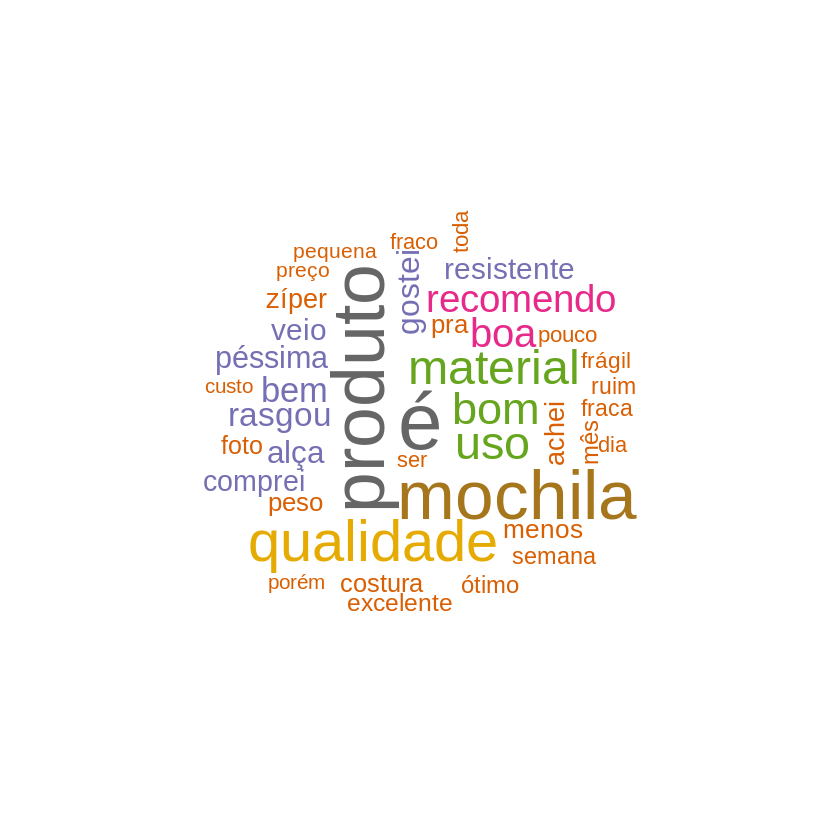

In [16]:
# Criar nuvem de palavras
cont_palav %>% with(wordcloud(word, n, random.order = FALSE, max.words = 40, colors=pal))

Nesta primeira an√°lise, observa-se que as palavras por si s√≥ n√£o trazem uma informa√ß√£o precisa, pois muitas delas precisam de outras palavras para ter sentido. Por exemplo, a palavra "qualidade" pode estar associada tanto a "boa" quanto a "p√©ssima", duas palavras que tamb√©m foram frequentes. No entanto, ainda sim a an√°lise nos d√° algumas informa√ß√µes que t√™m valores negativos, como "ruim", "feio" e "fraco".

## An√°lise de sentimentos com tokens combinados com a palavra "n√£o"
A palavra "n√£o" √© uma stopword e por isso foi removida automaticamente da an√°lise anterior. No entanto, √© importante consider√°-la, pois ela muda completamente o significado de um token. Por isso, vamos avaliar a frequ√™ncia de nega√ß√£o dos tokens mais comuns nas an√°lise anterior.

In [17]:
# Selecionar apenas coment√°rios que cont√©m a palavra "n√£o"
coment_cont_nao <- coment_prod %>% filter(str_detect(Comentario, "n√£o"))
nrow(coment_cont_nao)

[1] 169

O procedimento anterior foi realizado para reduzir o volume de dados processado, afinal, n√£o nos interessa processar coment√°rios sem a palavra n√£o neste momento. Dos 700 coment√°rios, restaram apenas 169.

In [18]:
# Extrair tokens bigramas
coment_prod_tokens_bigr <- coment_cont_nao %>%
                            unnest_tokens(word, Comentario, token = "ngrams", n = 2) %>%
                            filter(!grepl('[0-9]', word)) # Remove n√∫meros

#filter(!grepl('[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]', word))

In [19]:
# Visualizar resultado da extra√ß√£o dos tokens bigramas
head(coment_prod_tokens_bigr, 10)

word       
1  bom dia    
2  dia n√£o    
3  n√£o gostei 
4  gostei do  
5  do que     
6  que comprei
7  comprei vcs
8  vcs mostra 
9  mostra no  
10 no encarte

Aqui j√° vemos que quando a palavra "n√£o" aparece ap√≥s o token, este n√£o apresenta um significado l√≥gico. Por isso, vamos extrair apenas tokens que contenham a palavra "n√£o" no come√ßo.

In [20]:
# Obter apenas tokens que come√ßam com a palavra "n√£o"
coment_neg <- coment_prod_tokens_bigr %>% filter(str_detect(word, "^n√£o"))

head(coment_neg, 10)

word      
1  n√£o gostei
2  n√£o gostei
3  n√£o vou   
4  n√£o esse  
5  n√£o tem   
6  n√£o √©     
7  n√£o gostei
8  n√£o viram 
9  n√£o veio  
10 n√£o tem

In [21]:
# Contar a frequ√™ncia de ocorr√™ncia dos bigramas
cont_bigr <- coment_neg %>% count(word, sort = T)
head(cont_bigr)

word          n 
1 n√£o √©         37
2 n√£o recomendo 29
3 n√£o tem       23
4 n√£o gostei    14
5 n√£o aguenta    7
6 n√£o veio       7

Anteriormente, a palavra "recomendo" apareceu 72 vezes. Agora, vemos que 29 ocorr√™ncias da palavra "recomendo" est√£o associadas a palavra "n√£o".

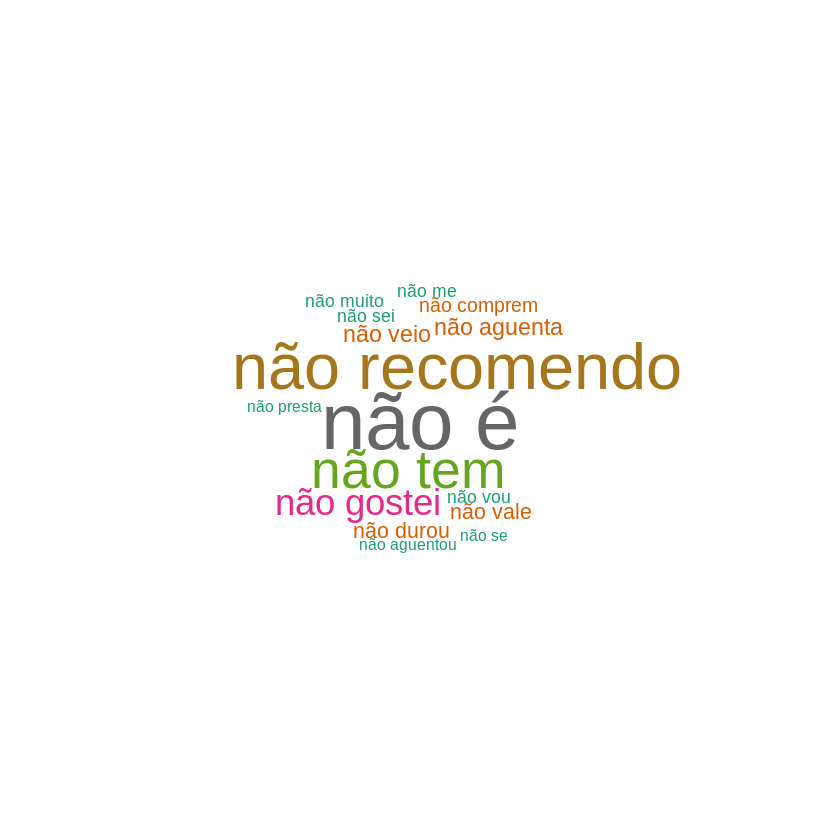

In [22]:
# Criar a nuvem de palabras com os bigramas
cont_bigr %>% with(wordcloud(word, n, random.order = FALSE, max.words = 50, colors=pal))

Vamos visualizar a propor√ß√£o das vezes em que os tokens mais frequentes vistos na primeira nuvem de palavras tinham significado negativo.

In [23]:
cont_bigr_tokens <- cont_bigr %>%
  unnest_tokens(tokens, word) %>%
  filter(tokens != "n√£o") %>%
  rename(n_neg = n) %>%
  inner_join(cont_palav, by = c("tokens" = "word")) %>%
  arrange(desc(n))  %>%
  select(tokens, n, n_neg)
head(cont_bigr_tokens, 10)
nrow(cont_bigr_tokens)

tokens    n   n_neg
1  √©         177 37   
2  mochila   150  1   
3  recomendo  72 29   
4  gostei     55 14   
5  veio       50  7   
6  parece     24  2   
7  vale       21  6   
8  vou        17  4   
9  usei       15  2   
10 cabe       12  2

[1] 82

In [24]:
# Preparar dados para construir gr√°fico de barras empilhadas
dados_long <- cont_bigr_tokens[1:10,] %>%
  pivot_longer(cols = c(n_neg, n), names_to = "Tipo", values_to = "Valor") # Transformar os dados para formato longo

head(dados_long)

# Calcular a frequ√™ncia relativa por token
percentual <- dados_long %>%
                group_by(tokens) %>%
                mutate(Perc = Valor / sum(Valor) * 100)

tokens    Tipo  Valor
1 √©         n_neg  37  
2 √©         n     177  
3 mochila   n_neg   1  
4 mochila   n     150  
5 recomendo n_neg  29  
6 recomendo n      72

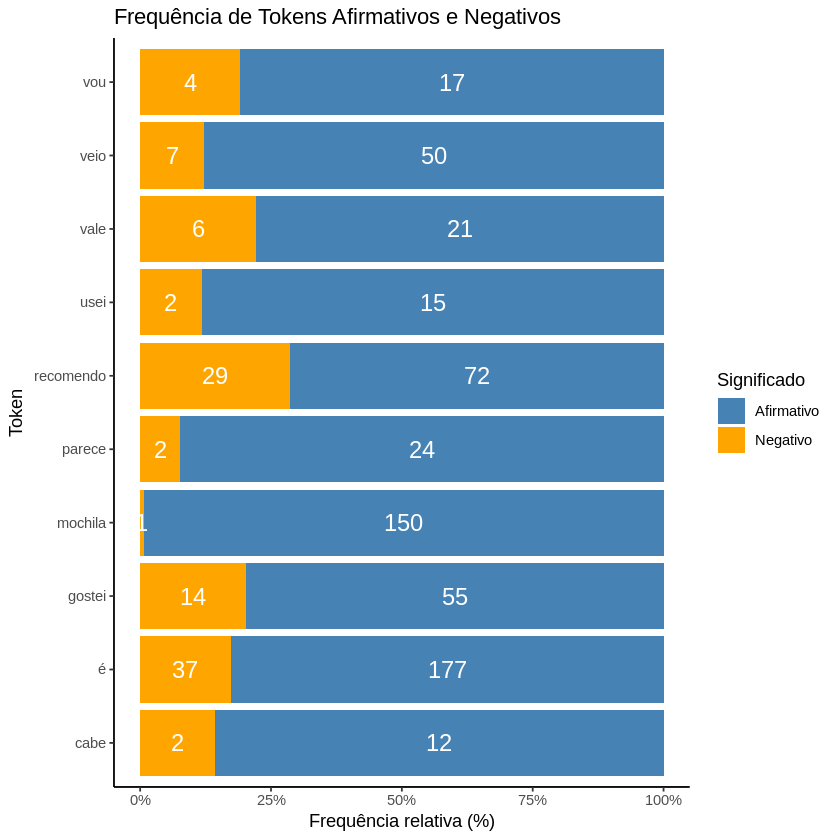

In [25]:
# Gr√°fico de barras empilhadas com r√≥tulos centralizados
ggplot(percentual, aes(x = tokens, y = Perc, fill = Tipo)) +
  geom_bar(stat = "identity", position = "stack") +  # Barras empilhadas
  geom_text(aes(label = Valor),
            position = position_stack(vjust = 0.5),  # Centraliza os r√≥tulos
            size = 5,
            color = "white") +                      # Cor do texto
  coord_flip() +                                    # Inverte os eixos
  scale_fill_manual(
    labels = c("n" = "Afirmativo", "n_neg" = "Negativo"),
    values = c("n" = "steelblue", "n_neg" = "orange")
  ) +
  labs(title = "Frequ√™ncia de Tokens Afirmativos e Negativos",
       x = "Token",
       y = "Frequ√™ncia relativa (%)",
       fill = "Significado") +
  theme_classic() +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) # Formato de porcentagem


Observa-se pelo gr√°fico que a maioria dos tokens mais frequentes s√£o, de fato, afirmativos. Agora, veremos quais palavras mais caracterizam os sentimentos positivos e negativos em rela√ß√£o ao produto com base nos coment√°rios.
Primeiramente, vamos classificar os tokens em positivos, negativos ou neutros de acordo com um dicion√°rio de sentimentos.

In [26]:
# Adicionar dicion√°rio de sentimentos em Portugu√™s
# https://b2find.eudat.eu/dataset/b6bd16c2-a8ab-598f-be41-1e7aeecd60d3
# https://b2share.eudat.eu/records/93ab120efdaa4662baec6adee8e7585f
dicio <- read.delim("/content/SentiLex-lem-PT02.txt", sep = ";", stringsAsFactors = FALSE, header = FALSE)
head(dicio, 5)

V1               V2        V3        V4       
1 √†-vontade.PoS=N  TG=HUM:N0 POL:N0=1  ANOT=MAN 
2 abafado.PoS=Adj  TG=HUM:N0 POL:N0=-1 ANOT=JALC
3 abafante.PoS=Adj TG=HUM:N0 POL:N0=-1 ANOT=MAN 
4 abaixado.PoS=Adj TG=HUM:N0 POL:N0=-1 ANOT=JALC
5 abalado.PoS=Adj  TG=HUM:N0 POL:N0=-1 ANOT=JALC

In [27]:
# Editar dicion√°rio para que seja poss√≠vel fazer uni√µes
dicio <- dicio %>%
  select(V1, V3) %>%
  mutate(V1 = str_extract(V1, "^[^\\.]*")) %>%
  mutate (V3 = str_extract(V3, "(?<=\\=).*")) %>%
  rename(word = V1, polar = V3)
head(dicio, 5)

word      polar
1 √†-vontade 1    
2 abafado   -1   
3 abafante  -1   
4 abaixado  -1   
5 abalado   -1

In [28]:
# Retirar coment√°rios que cont√©m a palavra "n√£o" para evitar confus√£o na interpreta√ß√£o da frequ√™ncia das palavras
coment_prod_tokens <- coment_prod %>%
                        filter(!str_detect(Comentario, "n√£o")) %>%
                        unnest_tokens(word, "Comentario") %>%
                        anti_join(get_stopwords(language = 'pt'))

Joining with `by = join_by(word)`


In [29]:
# Associar um sentimento a cada token
sentim <- coment_prod_tokens %>% inner_join(dicio, by = "word", relationship =
  "many-to-many")

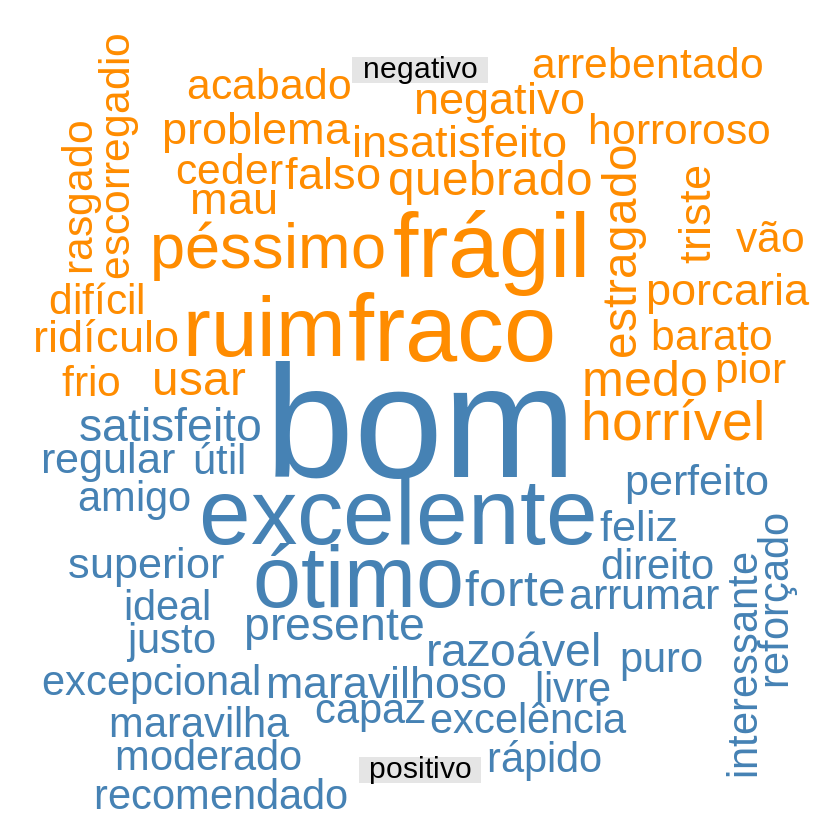

In [30]:
# Criar nuvem de palavras
sentim <- sentim %>% filter(polar != 0) %>% # retirar sentimentos neutros
    mutate(sentim_pos_neg = ifelse(polar==-1,"negativo","positivo"))

suppressWarnings({sentim %>%
  count(word, sentim_pos_neg, sort = TRUE) %>%
  acast(word ~ sentim_pos_neg, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("darkorange", "steelblue"),
                   scale = c(8, 2),
                   max.words = 100,
                   title.size = 1.5)
})

Na nuvem de palavas acima, algumas palavras n√£o fazem sentido neste contexto, como "amigo", "arrumar", "v√£o", "usar", "regular" e "direito", mas a grande maioria das palavras refletem uma opini√£o sobre o produto.

Visualmente, percebe-se uma divis√£o equalit√°ria entre os grupos, com uma tend√™ncia maior para a opini√£o positiva, dado que a palavra "bom" √© a maior de todas, ou seja, est√° em maior propor√ß√£o.

Para termos uma vis√£o geral dos sentimentos associados ao produto, podemos utilizar uma abordagem quantitativa, a qual utiliza os pesos atribu√≠dos aos sentimentos negativos (-1) e positivos (1).

In [31]:
# Realizar an√°lise explorat√≥ria dos sentimentos sobre o produto
sentim_dist <- sentim %>% distinct(word, .keep_all = TRUE)
print(paste("N√∫mero total de sentimentos distintos: ", nrow(sentim_dist)))
print(paste("N√∫mero de sentimentos distintos positivos: ", sum(sentim_dist$polar == 1)))
print(paste("N√∫mero de ocorr√™ncias de sentimentos positivos: ", sum(sentim$polar == 1)))
print(paste("N√∫mero de sentimentos distintos negativos: ", sum(sentim_dist$polar == -1)))
print(paste("N√∫mero de ocorr√™ncias de sentimentos negativos: ", sum(sentim$polar == -1)))

[1] "N√∫mero total de sentimentos distintos:  67"
[1] "N√∫mero de sentimentos distintos positivos:  34"
[1] "N√∫mero de ocorr√™ncias de sentimentos positivos:  189"
[1] "N√∫mero de sentimentos distintos negativos:  33"
[1] "N√∫mero de ocorr√™ncias de sentimentos negativos:  118"


In [32]:
# Somar o vetor de sentimentos
sentim_geral <- sum(as.numeric(sentim$polar))
sentim_geral

[1] 71

O resultado indica que houve 71 ocorr√™ncias de sentimentos positivos a mais do que negativos, o que indica um sentimento geral positivo nos coment√°rios sobre o produto. Podemos criar um √≠ndice para termos ideia de qu√£o negativo esse resultado √© dividindo-o pelo n√∫mero total de sentimentos positivos e negativos.
Este √≠ndica vai de -1 a 1, sendo que o sinal indica a polaridade de sentimento predominante e quanto mais pr√≥ximo o valor estiver dos extremos, maior √© a propor√ß√£o de sentimentos desta polaridade em rela√ß√£o aos sentimentos da polaridade oposta. Valores pr√≥ximos de zero indicam que a propor√ß√£o entre sentimentos opostos √© similar.

In [33]:
sentim_geral_index <- sentim_geral/sum(abs(as.numeric(sentim$polar)))
sentim_geral_index

[1] 0.2312704

Observa-se pelo resultado de sentim_geral_index que h√° uma sentimento geral positivo fraco, pois o valor √© mais pr√≥ximo de 0 do que de 1. Ou seja, os sentimentos positivos e negativos est√£o ligeiramente equilibrados. O ideal era que o valor fosse mais pr√≥ximo de 1, pois isso indicaria maior satisfa√ß√£o dos clientes em rela√ß√£o ao produto.

A an√°lise mostra que parte dos clientes demonstra uma boa impress√£o sobre o produo ap√≥s a compra, mas outra parte apresenta opini√£o negativa que est√° associada √† baixa resist√™ncia do produto verificada ap√≥s o uso.

O an√∫ncio alega que v√°rias estrutaras da mochila s√£o refor√ßadas, no entanto, clientes relataram que o produto danificou, o que foi expresso em adjetivos como "estragado" e "arrebentado". Clientes mencionaram estar "tristes" e "insatisfeitos" com o produto, possivelmente em decorr√™ncia do dano observado.

# Modelo de classifica√ß√£o Naive Bayes

Foi utilizado um corpus de sentimentos, os quais foram classificados em positivos ou negativos.

Os crit√©rios para classifica√ß√£o foram:
* Positivo: acima de 3 estrelas
* Negativo: abaixo de 3 estrelas

√â importante ressaltar que √© comum que algumas pessoas expressem uma opini√£o que n√£o condiz com o n√∫mero de estrelas que elas selecionam (susponhamos que seja por falta de aten√ß√£o). Portanto, sempre que poss√≠vel, deve-se utilizar um corpus que seja revisado (visualmente ou com ajuda de IA) para que haja coer√™ncia entre o coment√°rio e o sentimento expresso por ele.



In [34]:
# Preparar base de coment√°rios negativos
busc_neg = read.table("/content/buscape_pt_neg.txt", header = F, sep = "\t")
busc_neg["sentimento"] <- "Negativo"
names(busc_neg)[1] <- "texto"
str(busc_neg)
head(busc_neg)

'data.frame':	500 obs. of  2 variables:
 $ texto     : chr  "Quando eu comprei o aparelho ele era um otimo custo-beneficio, por√©m, hoje ele √© encontrado por 500 reais em mu"| __truncated__ "n√£o √© t√£o r√°pido quanto esperava que fosse. o sistema √© muito limitado e impondo limita√ß√£o ao usu√°rio, n√£o perm"| __truncated__ "A semana passda dia 17/05 adiquiri um dm4 2035br vei com defeito nao se conectava a internet depois de utilisar"| __truncated__ "estamos lavando lou√ßa na pia da cozinha, com uma m√°quina novinha em folha bem ali do lado, totalmente in√∫til. a"| __truncated__ ...
 $ sentimento: chr  "Negativo" "Negativo" "Negativo" "Negativo" ...


texto                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1 Quando eu comprei o aparelho ele era um otimo custo-beneficio, por√©m, hoje ele √© encontrado por 500 reais em muitas lojas, e com esse valor √© possivel comprar aparelhos melhores, como o xperia mini, por√©m, o tamanho da sua tela agrada para um aparelho dessa faixa de pre√ßo, a sua memoria ram √© de 512mb, e permite a execu√ß√£o de varios aplicativos ao mesmo tempo, seu processador tambem n√£o faz feio, muito menos sua gpu, que √© uma adreno 205, a mesma utilizada pelo xperia play. Outro ponto em que o aparelho n√£o peca √© na durabilidade da bateria, pelo fato de ser uma bateria de 1540 mah, que chega a durar 2 dias de uso moderado. Mas sua c√¢mera apesar de ter 5mpx n√£o √© das melhores e quanto ao flash LED, n√£o espere que ele fa√ßa milagre, pois quando ativado parece piorar a qualidade da imagem mais ainda, outro fato de encomoda √© a falta de respeito por parte da motorola quanto √† atualiza√ß√£o do android, que se quer se pronunciou sobre o spice xt531, e o aparelho continua com o android 2.3, enquanto ja existe o android 4.1. O que gostei: Bateria de alta durabilidade, 512mb de memoria ram, Design bonito, acabamento traseiro de qualidade, c√¢mera frontal. O que n√£o gostei: Sem atualiza√ß√£o para o android 4.0, C√¢mera ruim, Tela de baixa qualidade.
2 n√£o √© t√£o r√°pido quanto esperava que fosse. o sistema √© muito limitado e impondo limita√ß√£o ao usu√°rio, n√£o permitindo criar grupo de trabalho, n√£o permitindo instalar alguns programas que s√£o excensiais para meu trabalho. Por conta disso perdi todo o historico da minha vida e todos os documentos de anos de trabalho, pois o disco do win7 que veio com ele formata o pc sem nenhuma intera√ß√£o com o usuario, basta colocar o disco do drive. O monitor veio com uma faixa vertical na imagem e ate hoje n√£o consegui que a dell resolvesse esse problema. J√° cansei de entrar em contato e enviar a nota fiscal por email sem que alguem responda. O que gostei: teclado bom; O que n√£o gostei: monitor e win 7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
3 A semana passda dia 17/05 adiquiri um dm4 2035br vei com defeito nao se conectava a internet depois de utilisar toda sua tecnologia de conectidade devolvi para carrefour. Comprei um dm4 2155

In [35]:
# Preparar base de coment√°rios positivos
busc_pos = read.table("/content/buscape_pt_pos.txt", header = F, sep = "\t")
busc_pos["sentimento"] <- "Positivo"
names(busc_pos)[1] <- "texto"
str(busc_pos)
head(busc_pos)

'data.frame':	415 obs. of  2 variables:
 $ texto     : chr  "N√£o tenho uma opini√£o negativa. Quando tiver venho aqui escrever! O que gostei: Avalia√ß√£o da T4I. Eu particular"| __truncated__ "Este produto √© realmente incr√≠vel! Al√©m das fun√ß√µes ele possui Android 4.1 (o mais avan√ßado) e √© garantida a at"| __truncated__ "Al√©m da excelente qualidade de imagem/som e de todos os recursos, os brindes e as demais vantagens que qualquer"| __truncated__ "O produto √© excelente, quem puder comprar compre direto com a Kikos √© melhor! O que gostei: A esteira √© excelen"| __truncated__ ...
 $ sentimento: chr  "Positivo" "Positivo" "Positivo" "Positivo" ...


texto                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1 N√£o tenho uma opini√£o negativa. Quando tiver venho aqui escrever! O que gostei: Avalia√ß√£o da T4I. Eu particularmente casei com esta c√¢mera. Principais mudan√ßas que percebi a anterior (T3i) foram: Tela touch - Otimo para efetuar mudan√ßas rapidas Como apenas com um toque no display,voc√™ escolhe a area de prioridade no foco. Microfone stereo - Otimo para de grava√ß√£o de video. N√≠vel interno - Ao colocar ela num trip√© ou apoio, com esse programa podera ver esta nivelada. Display - Possui um display em que as digitais quase nao ficam aquela marca de gordura dos dedos. Procesador H√≠brido (Hybrid CMOS) - O Hybrid CMOS inclui pixels dedicados que auxiliam na detec√ß√£o de fase e foco autom√°tico. FOCO - 2 novos tipos de modo: 1)Flexzone -Onde voc√™ escolhe o assunto a ser focado apenas tocando no display. (gracas ao touch). 2) Quick Focus - ele segue o assunto e vai equilibrando o foco de acordo com que o assunto se move. Existem outras novidades, Como de ISO 100 at√© ISO 12,800/2560 mas essas pra mim foram as melhores. √â uma magnifica DSLR de entrada. O que n√£o gostei: Ainda n√£o encontrei contras. Quando encontrar venho aqui escrever!                                                                                                                                                                                                                                                                                         
2 Este produto √© realmente incr√≠vel! Al√©m das fun√ß√µes ele possui Android 4.1 (o mais avan√ßado) e √© garantida a atualiza√ß√£o para a pr√≥xima vers√£o do Android. As fotos s√£o muito boas, n√£o sinto falta do flash pois al√©m de ter uma c√¢mera de 5MP, ele possui um recurso chamado BSI, deixando a foto muito mais detalhada do que nos celulares comuns. Mesmo de noite! O processador facilita muito para baixar programas e arquivos. E ainda conta com a TV digital. A √∫nica coisa que n√£o se pode dizer das melhores, √© o design e o display. O design n√£o √© daqueles mais lindos! Pode se considerar agrad√°vel. O display, para quem est√° acostumado com telas muito maiores, pode estranha um pouco. Em quest√£o ao pre√ßo, o assunto indiscut√≠vel! Este √© um celular com muitas qualidades por um pre√ßo acess√≠vel. Estou muito satisfeita.                                                                                                                                                                                                                                                                                                     

In [36]:
# Unir os coment√°rios positivos e negativos e analisar a estrutura
dataset_sent <- rbind(busc_pos, busc_neg)
str(dataset_sent)

'data.frame':	915 obs. of  2 variables:
 $ texto     : chr  "N√£o tenho uma opini√£o negativa. Quando tiver venho aqui escrever! O que gostei: Avalia√ß√£o da T4I. Eu particular"| __truncated__ "Este produto √© realmente incr√≠vel! Al√©m das fun√ß√µes ele possui Android 4.1 (o mais avan√ßado) e √© garantida a at"| __truncated__ "Al√©m da excelente qualidade de imagem/som e de todos os recursos, os brindes e as demais vantagens que qualquer"| __truncated__ "O produto √© excelente, quem puder comprar compre direto com a Kikos √© melhor! O que gostei: A esteira √© excelen"| __truncated__ ...
 $ sentimento: chr  "Positivo" "Positivo" "Positivo" "Positivo" ...


In [37]:
# Prepara√ß√£o dos dados
corpus = VCorpus(VectorSource(dataset_sent$texto))
corpus = tm_map(corpus, content_transformer(tolower)) # Colocar tudo em letras min√∫sculas
corpus = tm_map(corpus, removeNumbers) # Remover n√∫meros
corpus = tm_map(corpus, removePunctuation) # Remover pontua√ß√£o
corpus = tm_map(corpus, removeWords, stopwords("english")) # Remover stopwords
corpus = tm_map(corpus, stemDocument) # Realizar extra√ß√£o das ra√≠zes das palavras
corpus = tm_map(corpus, stripWhitespace) # Remover espa√ßos em branco
as.character(corpus[[1]])

[1] "n√£o tenho uma opini√£o negativa quando tiver venho aqui escrev o que gostei avalia√ß√£o da ti eu particularment casei com esta c√¢mera principai mudan√ßa que percebi anterior ti foram tela touch otimo para efetuar mudan√ßa rapida como apena com um toqu displayvoc√™ escolh area de prioridad foco microfon stereo otimo para de grava√ß√£o de video n√≠vel interno ao colocar ela num trip√© ou apoio com ess programa podera ver esta nivelada display possui um display em que digitai quas nao ficam aquela marca de gordura dos dedo procesador h√≠brido hybrid cmos o hybrid cmos inclui pixel dedicado que auxiliam na detec√ß√£o de fase e foco autom√°tico foco novo tipo de modo flexzon ond voc√™ escolh o assunto ser focado apena tocando display graca ao touch quick focus ele segu o assunto e vai equilibrando o foco de acordo com que o assunto se move existem outra novidad como de iso at√© iso mas essa pra mim foram melhor √© uma magnifica dslr de entrada o que n√£o gostei ainda n√£o encontrei contra quando encontrar venho aqui escrev"

In [38]:
# Criar a Document Term Matrix, matriz de dados que conta a presen√ßa de cada termo em cada documento (coment√°rio)
dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999) # Fun√ß√£o para remover termos muito raros
inspect(dtm)
dim(dtm)


<<DocumentTermMatrix (documents: 915, terms: 16880)>>
Non-/sparse entries: 119076/15326124
Sparsity           : 99%
Maximal term length: 596
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  com gostei mai muito n√£o para por  que tem uma
  162 525    305 312   361 588  542 168 1157 202 346
  283  88     52  40    80 123  103  14  174  40  74
  392  90     57  50    65 113  102  31  214  40  68
  453 189    137 108    99 386  181  83  515  99 154
  494  83     62  50    36 158   92  35  223  35  62
  570 100     93  55    61 270  116  25  317  35  83
  648 103     92  55    52 261   90  43  314  45  74
  812 114     72  70    62 208   87  61  310  41  88
  838 200    158  90   124 443  222  95  623  94 142
  896 144    110  87    60 284  157  55  455  47 117


[1]   915 16880

In [39]:
# Fun√ß√£o para transformar ocorr√™ncias em "Yes" e n√£o-ocorr√™ncias em "No"
convert <- function(x)
  {
y <- ifelse(x > 0, 1,0)
y <- factor(y, levels=c(0,1), labels=c("No", "Yes"))
y
  }

datanaive = apply(dtm, 2, convert)

In [40]:
dataset = as.data.frame(as.matrix(datanaive))
dataset$Class = factor(dataset_sent$sentimento)

In [41]:
head(dataset)

¬¥claro ¬¥depoi ¬¥proprio ¬®g√™nio¬® ¬®nova¬® ¬®porcarias¬® aaa aaapalito aac aacgp ‚ãØ
1 No     No     No       No      No     No          No  No        No  No    ‚ãØ
2 No     No     No       No      No     No          No  No        No  No    ‚ãØ
3 No     No     No       No      No     No          No  No        No  No    ‚ãØ
4 No     No     No       No      No     No          No  No        No  No    ‚ãØ
5 No     No     No       No      No     No          No  No        No  No    ‚ãØ
6 No     No     No       No      No     No          No  No        No  No    ‚ãØ
  zoomtem zoon zte zum zumbido zumbidochiado zunbido zune zunido Class   
1 No      No   No  No  No      No            No      No   No     Positivo
2 No      No   No  No  No      No            No      No   No     Positivo
3 No      No   No  No  No      No            No      No   No     Positivo
4 No      No   No  No  No      No            No      No   No     Positivo
5 No      No   No  No  No      No            No      No   No     Positivo
6 No      No   No  No  No      No            No      No   No     Positivo

In [42]:
# Separar corpus em conjunto de treinamento e de teste
set.seed(31)
split = sample(2,nrow(dataset),prob = c(0.75,0.25),replace = TRUE)
train_set = dataset[split == 1,]
test_set = dataset[split == 2,]

prop.table(table(train_set$Class))
prop.table(table(test_set$Class))


Negativo Positivo 
0.548048 0.451952 


 Negativo  Positivo 
0.5421687 0.4578313 

In [43]:
# Criar a fun√ß√£o de classifica√ß√£o
classifier_nb <- naiveBayes(train_set, train_set$Class)

In [44]:
# Testar desempenho do modelo com o conjunto de teste
nb_pred = predict(classifier_nb, type = 'class', newdata =  test_set)
confusionMatrix(nb_pred,test_set$Class)

Confusion Matrix and Statistics

          Reference
Prediction Negativo Positivo
  Negativo      127       25
  Positivo        8       89
                                         
               Accuracy : 0.8675         
                 95% CI : (0.8189, 0.907)
    No Information Rate : 0.5422         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7299         
                                         
 Mcnemar's Test P-Value : 0.005349       
                                         
            Sensitivity : 0.9407         
            Specificity : 0.7807         
         Pos Pred Value : 0.8355         
         Neg Pred Value : 0.9175         
             Prevalence : 0.5422         
         Detection Rate : 0.5100         
   Detection Prevalence : 0.6104         
      Balanced Accuracy : 0.8607         
                                         
       'Positive' Class : Negativo       
                    

O modelo conseguiu prever corretamente os sentimentos associados aos coment√°rios em 86,75% do conjunto de teste.

In [45]:
# Aplicar o modelo no conjunto de coment√°rios sobre o produto
corpus = VCorpus(VectorSource(coment_prod$Comentario))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)
as.character(corpus[[1]])

dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999)
inspect(dtm)
dim(dtm)

datanaive = apply(dtm, 2, convert)

dataset = as.data.frame(as.matrix(datanaive))

nb_pred_mochila = predict(classifier_nb, type = 'class', newdata =  dataset)

[1] "bom dia n√£o gostei que comprei vcs mostra encart uma coisa e manda outra dessa mochila aqui eu compro por reai n√£o gostei √© um produto de p√©ssima qualidad s√≥ n√£o vou devolv porqu√™ meu filho t√° precisando pelo valor que eu paguei era por um produto de boa qualidad e n√£o ess que vc mandou"

<<DocumentTermMatrix (documents: 700, terms: 1366)>>
Non-/sparse entries: 6963/949237
Sparsity           : 99%
Maximal term length: 21
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  com materi mochila muito n√£o produto qualidad que uma uso
  1     0      0       1     0   4       2        2   3   1   0
  100   1      0       1     1   4       1        0   5   1   0
  154   1      0       0     1   1       0        0   2   0   1
  2     2      0       3     0   2       1        1   1   2   1
  201   0      2       1     1   3       0        0   0   0   0
  206   0      0       0     1   1       1        0   3   3   0
  23    1      0       2     0   1       0        0   0   0   2
  4     2      1       0     0   4       0        1   2   1   0
  413   1      0       1     0   0       0        0   2   0   1
  7     0      1       0     0   3       0        0   1   0   0


[1]  700 1366

In [46]:
# Incluir sentimento no conjunto de coment√°rios
coment_prod["Sentimento"] <- nb_pred_mochila

In [47]:
# Visualizar alguns coment√°rios positivos
coment_pos <- coment_prod %>% filter(Sentimento == "Positivo")
head(coment_pos, 10)

Comentario                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1  Ela √© bem grande conforme anunciado, mas as al√ßas n√£o s√£o refor√ßadas como diz na descri√ß√£o, e n√£o tem o refor√ßo nas costas como diz tamb√©m na descri√ß√£o. Deixando a desejar nesse ponto, o material realmente √© imperme√°vel bonita e bastante espa√ßosa. S√≥ deixou a desejar mesmo nos ponto onde fala que √© refor√ßa √© n√£o.                                                                                                                                                                                                                                    
2  A mochila √© muito bonita,grande muito espa√ßosa. E pelo pre√ßo compensou. Mas o z√≠per da parte, do bolso maior trava ent√£o s√≥ d√° , usar somente um ziper do lado. Mas fora isso estou usando tranquilamente, n√£o me deu problemas at√© agora al√©m desse.                                                                                                                                                                                                                                                                                                         
3  Super indico comprei pra mim levar as coisa pro trabalho de moto e amei muito bom e o pre√ßo super em conta valeu apena e certeza indicarem pra todos que queiram.                                                                                                                                                                                                                                                                                                                                                                                             
4  A mochila √© grande e espa√ßosa, por√©m, em um m√™s de uso est√° bastante avariada. A costura interna se abriu por 2 bolsos em apenas 1; a al√ßa direita est√° completamente desfeita. Dentro dela eu costumava levar o notebook, o carregador, o celular e seu carregador, minha n√©cessaire com itens de higiene bucal e os cart√£o de passagem. O peso n√£o justifica o tamanho da avaria. A mochila √© de fato linda e os itens para o uso de carregador e fone de ouvido, s√£o maravilhosos, por√©m ela √© fr√°gil demais, para quem trabalha e precisa dela diriamente.
5  O produto n√£o atendeu minhas expectativas, nas imagens parece ser grande por√©m a realidade e outra com ela em m√£os! parece mochila de crian√ßa, muito pouco espa√ßo e al√©m disso qualidade baixa pois est√° desfiando tudo.                                                                                                                                                                                                                                                                                                                                      
6  Um m√™s de uso a mochila se desfez! todas as divis√≥rias de bolsos se rasgaram. Quero deixar claro que n√£o levo coisas pesadas, apenas um casaco uma blusa de uniforme, marmita e carteira e uma n√©cessaire. N√£o recomendo de forma alguma.                                                                                                                                                                                                                                                                                                                     
7  √ìtima qualidade a mochila, perfeita.                                                                                   

Fazendo uma breve avalia√ß√£o das classifica√ß√µes com base em 10 coment√°rios, 5 coment√°rios s√£o completamente positivos (o 3¬∫ e os 4 √∫ltimos).

O 1¬∫, o 2¬∫ e o 4¬∫ trazem uma perspectiva positiva juntamente com cr√≠ticas negativas.

O 5¬∫ e o 6¬∫ coment√°rio na verdade expressam uma opini√£o completamente negativa.

Com base nestes 10 coment√°rios avaliados individualmente, podemos dizer que o algoritmo acertou 50% das vezes.

Para melhorar a percep√ß√£o de acur√°cia do algoritmo, pode ser necess√°rio avaliar individualmente um n√∫mero maior de coment√°rios.

In [48]:
# Visualizar alguns coment√°rios negativos
coment_neg <- coment_prod %>% filter(Sentimento == "Negativo")
head(coment_neg, 10)

Comentario                                                                                                                                                                                                                                                                                                                                                                           
1  Bom dia, n√£o gostei do que comprei, vcs mostra no encarte uma coisa e manda outra. Dessa mochila aqui eu compro por 40,00 reais n√£o gostei √© um produto de p√©ssima qualidade. S√≥ n√£o vou devolver porqu√™ meu filho t√° precisando. Pelo valor que eu paguei era por um produto de boa qualidade e n√£o esse que vc me mandou.                                                          
2  P√©ssima.\nNunca comprei uma mochila t√£o ruim, e de p√©ssima qualidade igual essa! menos de dois meses de uso est√° desmanchando toda, descascando tudo por dentro, as costuras soltando, decepcionada com o produto. N√£o tem nada a ver com a propaganda que fazem, n√£o √© a mesma mochila, dinheiro jogado fora √© ainda comprei duas. Querem uma mochila descart√°vel pode comprar essa.
3  Bom dia, n√£o gostei da mochila material p√©ssimo, j√° est√° descosturando em v√°rias partes da mochila,pelo o valor achei que o produto teria uma qualidade boa,ontem j√° levei pro sapateiro da uma refor√ßada nas costuras, al√©m do valor pago vou desembolsar mais 20 reais pra consertar.                                                                                              
4  As al√ßas n√£o viram conforme a foto, vira com apenas uma costura e sem o acolchoado, para carregar com peso fica bem desconfort√°vel sem o acolchoado nas al√ßas, a parte interna n√£o veio conforme a foto, n√£o tem o el√°stico que prende o notebook. Material at√© parece ter qualidade mas as al√ßas n√£o d√£o seguran√ßa que vai aguentar.                                                
5  Nossa super decepcionada com a mercadoria meu filho n√£o usou nem uma semana j√° tive que refor√ßa a custura,sem contar que z√≠per j√° estragou,a mochila aparentemente parece ser resistente, mas a custura de p√©ssima qualidade. A mochila j√° est√° encostada aqui,foi um dinheiro jogado fora.                                                                                          
6  A mochila bem fr√°gil rasgou muito r√°pido, menos de um m√™s de uso a forra√ß√£o por dentro ,no bolso da lateral tamb√©m tive que costurar para poder usar mais um pouquinho e ela toda mole bem dif√≠cil de manusear o sippers ,eu comprei mas n√£o recomendo comprar e n√£o comprarei de novo essa mochila.                                                                                 
7  O produto √© bem inferior ao que √© mostrado na foto. V√°rias linhas de costura soltas, os puxadores dos z√≠peres s√£o diferentes dos da foto e as al√ßas s√£o bem finas. Definitivamente n√£o √© uma mochila para todas as ocasi√µes.                                                                                                                                                         
8  Estou decepcionada. Pois avisei que a mochila rompeu, e n√£o √© por causa de peso, e sim por uma costura fragil demais. Estou a semanas, quase 1 mes tentando entrar em contato pelo chat, mas ningu√©m visualiza. Como fico? no prejuizo ?.                                                                                                                                            
9  Muito ruim. Em menos de 60 dias arrebentou al√ßa e descosturando.\n√önico peso que carrego e um par de botas menos de 2k. Maior peso que carreguei foi uma vez em viagem. Cerca de 7 kg. Arrebentou. Muito fraquinha n√£o recomendo.                                                                                                                                                    
10 Produto mto fraco. A primeira vez que usei estragou o tecido de dentro, e menos de 1 semana j√° estragou a al√ßa.\nDeixando claro que n coloco peso na mochila,

Para os coment√°rios negativos, a quantidade de previs√µes corretas do algoritmo parece ser de 100%, j√° que todos os coment√°rios selecionados tem opini√µes completamente negativas a respeito do produto.

In [49]:
# Visualizar a frequ√™ncia absoluta de coment√°rios negativos e positivos
table(coment_prod$Sentimento)


Negativo Positivo 
     669       31 

Observa-se que houve muito mais coment√°rios negativos do que positivos.

Se considerarmos a taxa de 50% de acerto para coment√°rios positivos, ter√≠amos apenas 15 coment√°rios totalmente positivos e 10 coment√°rios positivos com cr√≠tica negativa, de um total de 700.

Assumindo que essa taxa seja verdadeira, identificamos que a percep√ß√£o sobre o produto √© muito mais negativa do que foi identificada na an√°lise descritiva.

Futuramente, pode ser interessante testar o desempenho de outros modelos de classifica√ß√£o, como Suport Vector Machine (SVM).

Para finalizar, caso houvesse uma informa√ß√£o de n√∫mero de likes nos coment√°rios, poder√≠amos orden√°-los para identificar os mais relevantes.

# Modelo de classifica√ß√£o Suport Vector Machine (SVM)

In [50]:
# Prepara√ß√£o dos dados
corpus = VCorpus(VectorSource(dataset_sent$texto))
corpus = tm_map(corpus, content_transformer(tolower)) # Colocar tudo em letras min√∫sculas
corpus = tm_map(corpus, removeNumbers) # Remover n√∫meros
corpus = tm_map(corpus, removePunctuation) # Remover pontua√ß√£o
corpus = tm_map(corpus, removeWords, stopwords("english")) # Remover stopwords
corpus = tm_map(corpus, stemDocument) # Realizar extra√ß√£o das ra√≠zes das palavras
corpus = tm_map(corpus, stripWhitespace) # Remover espa√ßos em branco
as.character(corpus[[1]])

# Criar a Document Term Matrix, matriz de dados que conta a presen√ßa de cada termo em cada documento (coment√°rio)
dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999) # Fun√ß√£o para remover termos muito raros
important_terms <- findFreqTerms(dtm, lowfreq = 2)  # Ret√©m termos com frequ√™ncia >= 2 (ajuste conforme o poder computacional dispon√≠vel)
dtm <- dtm[, important_terms]
inspect(dtm)
dim(dtm)

[1] "n√£o tenho uma opini√£o negativa quando tiver venho aqui escrev o que gostei avalia√ß√£o da ti eu particularment casei com esta c√¢mera principai mudan√ßa que percebi anterior ti foram tela touch otimo para efetuar mudan√ßa rapida como apena com um toqu displayvoc√™ escolh area de prioridad foco microfon stereo otimo para de grava√ß√£o de video n√≠vel interno ao colocar ela num trip√© ou apoio com ess programa podera ver esta nivelada display possui um display em que digitai quas nao ficam aquela marca de gordura dos dedo procesador h√≠brido hybrid cmos o hybrid cmos inclui pixel dedicado que auxiliam na detec√ß√£o de fase e foco autom√°tico foco novo tipo de modo flexzon ond voc√™ escolh o assunto ser focado apena tocando display graca ao touch quick focus ele segu o assunto e vai equilibrando o foco de acordo com que o assunto se move existem outra novidad como de iso at√© iso mas essa pra mim foram melhor √© uma magnifica dslr de entrada o que n√£o gostei ainda n√£o encontrei contra quando encontrar venho aqui escrev"

<<DocumentTermMatrix (documents: 915, terms: 8557)>>
Non-/sparse entries: 110753/7718902
Sparsity           : 99%
Maximal term length: 85
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  com gostei mai muito n√£o para por  que tem uma
  162 525    305 312   361 588  542 168 1157 202 346
  283  88     52  40    80 123  103  14  174  40  74
  392  90     57  50    65 113  102  31  214  40  68
  453 189    137 108    99 386  181  83  515  99 154
  494  83     62  50    36 158   92  35  223  35  62
  570 100     93  55    61 270  116  25  317  35  83
  648 103     92  55    52 261   90  43  314  45  74
  812 114     72  70    62 208   87  61  310  41  88
  838 200    158  90   124 443  222  95  623  94 142
  896 144    110  87    60 284  157  55  455  47 117


[1]  915 8557

In [51]:
dtm <- as.data.frame(as.matrix(dtm))

# Adicionar a vari√°vel de r√≥tulo (sentimento)
dtm$sentiment <- factor(dataset_sent$sentimento)

In [52]:
head(dtm)

aaa aac aba abafado abaixar abaixo abelha aberra√ß√£o aberta aberto ‚ãØ zerar
1 0   0   0   0       0       0      0      0         0      0      ‚ãØ 0    
2 0   0   0   0       0       0      0      0         0      0      ‚ãØ 0    
3 0   0   0   0       0       0      0      0         0      0      ‚ãØ 0    
4 0   0   0   0       0       0      0      0         0      0      ‚ãØ 0    
5 0   0   0   0       0       0      0      0         0      0      ‚ãØ 0    
6 0   0   0   0       0       0      0      0         0      0      ‚ãØ 0    
  zero zona zoom zte zum zumbido zune zunido sentiment
1 0    0    0    0   0   0       0    0      Positivo 
2 0    0    0    0   0   0       0    0      Positivo 
3 0    0    0    0   0   0       0    0      Positivo 
4 0    0    0    0   0   0       0    0      Positivo 
5 0    0    0    0   0   0       0    0      Positivo 
6 0    0    0    0   0   0       0    0      Positivo

In [53]:
# Divis√£o dos dados
set.seed(31)
trainIndex <- createDataPartition(dtm$sentiment, p = 0.8, list = FALSE)
trainData <- dtm[trainIndex, ]
testData <- dtm[-trainIndex, ]


Para o modelo SVM, o *document term matrix* n√£o foi reclassificado em "Yes" ou "No" porque o modelo requer que os dados sejam num√©ricos.

In [54]:
# Treinar o modelo SVM
modelo_svm <- svm(sentiment ~ ., data = trainData, kernel = "linear", cost = 1)

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
‚ÄúVariable(s) ‚Äòabusiva‚Äô and ‚Äòac√∫stica‚Äô and ‚Äòadaptando‚Äô and ‚Äòadolescent‚Äô and ‚Äòaleat√≥ria‚Äô and ‚Äòalemanha‚Äô and ‚Äòalimentado‚Äô and ‚Äòalinhamento‚Äô and ‚Äòamazon‚Äô and ‚Äòaquecedoretcn√£o‚Äô and ‚Äòarmada‚Äô and ‚Äòarrependom‚Äô and ‚Äòasf‚Äô and ‚Äòbact√©ria‚Äô and ‚Äòbasicao‚Äô and ‚Äòbastava‚Äô and ‚Äòbendito‚Äô and ‚Äò`bluetrack¬Æ`‚Äô and ‚Äòborderland‚Äô and ‚Äòcabe√ßacompr‚Äô and ‚Äòcabl‚Äô and ‚Äòca√ßamba‚Äô and ‚Äòcamada‚Äô and ‚Äòc√°psula‚Äô and ‚Äòcatastorfr‚Äô and ‚Äòcesar‚Äô and ‚Äòcommando‚Äô and ‚Äòcompanheira‚Äô and ‚Äòcompanhia‚Äô and ‚Äòconcorra‚Äô and ‚Äòcone‚Äô and ‚Äòconsiderada‚Äô and ‚Äòconvencionaisquem‚Äô and ‚Äòcorda‚Äô and ‚Äòcozido‚Äô and ‚Äòcriptografia‚Äô and ‚Äòcrit√©rio‚Äô and ‚Äòcritico‚Äô and ‚Äòcupom‚Äô and ‚Äòcuriosa‚Äô and ‚Äòdadosenergia‚Äô and ‚Äòdali‚Äô and ‚Äòd√©cimo‚Äô and ‚Äòdecorativo‚Äô and ‚Äòdefeituosa‚Äô and ‚Äòdellar‚Äô and ‚Äòdescar

In [55]:
# Previs√µes
predicoes <- predict(modelo_svm, testData)

# Matriz de confus√£o
confusionMatrix(predicoes, testData$sentiment)


Confusion Matrix and Statistics

          Reference
Prediction Negativo Positivo
  Negativo       89        7
  Positivo       11       76
                                         
               Accuracy : 0.9016         
                 95% CI : (0.849, 0.9407)
    No Information Rate : 0.5464         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.8024         
                                         
 Mcnemar's Test P-Value : 0.4795         
                                         
            Sensitivity : 0.8900         
            Specificity : 0.9157         
         Pos Pred Value : 0.9271         
         Neg Pred Value : 0.8736         
             Prevalence : 0.5464         
         Detection Rate : 0.4863         
   Detection Prevalence : 0.5246         
      Balanced Accuracy : 0.9028         
                                         
       'Positive' Class : Negativo       
                    

O modelo SVM teve uma acur√°cia ligeiramente maior que a do Naive Bayes.

Vale lembrar que n√£o devemos comparar a matriz de confus√£o do modelo SVM com a do modelo Naive Bayes porque o tamanho da *document term matrix* √© diferente (j√° que reduzimos a dtm para que o modelo SVM fosse treinado, dada a limita√ß√£o computacional).

Vamos ver seu desempenho no conjunto de coment√°rios sobre o produto.

In [63]:
# Aplicar o modelo no conjunto de coment√°rios sobre o produto
corpus = VCorpus(VectorSource(coment_prod$Comentario))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)
as.character(corpus[[1]])

dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999)
inspect(dtm)
dim(dtm)

# Transformar o DTM dos novos coment√°rios em data frame
new_dtm <- as.data.frame(as.matrix(dtm))

# Garantir que as colunas sejam iguais √†s do treinamento (requisito importante para usar o modelo SVM, o que n√£o √© necess√°rio para Naive Bayes)
missing_terms <- setdiff(colnames(trainData[, -ncol(trainData)]), colnames(new_dtm))
for (term in missing_terms) {
    new_dtm[[term]] <- 0  # Adicionar termos ausentes com valor 0
}

# Remover colunas extras
new_dtm <- new_dtm[, colnames(trainData[, -ncol(trainData)])]

# Fazer previs√µes
svm_pred_mochila <- predict(modelo_svm, newdata = new_dtm)


[1] "bom dia n√£o gostei que comprei vcs mostra encart uma coisa e manda outra dessa mochila aqui eu compro por reai n√£o gostei √© um produto de p√©ssima qualidad s√≥ n√£o vou devolv porqu√™ meu filho t√° precisando pelo valor que eu paguei era por um produto de boa qualidad e n√£o ess que vc mandou"

<<DocumentTermMatrix (documents: 700, terms: 1366)>>
Non-/sparse entries: 6963/949237
Sparsity           : 99%
Maximal term length: 21
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  com materi mochila muito n√£o produto qualidad que uma uso
  1     0      0       1     0   4       2        2   3   1   0
  100   1      0       1     1   4       1        0   5   1   0
  154   1      0       0     1   1       0        0   2   0   1
  2     2      0       3     0   2       1        1   1   2   1
  201   0      2       1     1   3       0        0   0   0   0
  206   0      0       0     1   1       1        0   3   3   0
  23    1      0       2     0   1       0        0   0   0   2
  4     2      1       0     0   4       0        1   2   1   0
  413   1      0       1     0   0       0        0   2   0   1
  7     0      1       0     0   3       0        0   1   0   0


[1]  700 1366

In [65]:
# Resumo das previs√µes
table(svm_pred_mochila)

# Se quiser visualizar junto com os coment√°rios originais
coment_prod$predicted_sentiment <- svm_pred_mochila


svm_pred_mochila
Negativo Positivo 
     700        0 

Observa-se que este modelo classificou todos os coment√°rios em negativos. Pela an√°lise anterior, sabemos que h√° um erro, pois de fato existem alguns coment√°rios positivos. Portanto, o modelo SVM n√£o performou bem nos dados, embora tenha exibido acur√°cia ligeiramente maior que o Naive Bayes.

O modelo SVM apresentou menor sensitividade, ou seja, previu corretamente menos positivos verdadeiros do que o Naive Bayes. Isso pode ter sido a causa do baixo desempenho em identificar coment√°rios positivos nos conjunto de coment√°rios sobre a mochila.

Por outro lado, a especificidade, ou seja, a capacidade de identificar corretamento negativos verdadeiros, foi maior no modelo SVM do que no Naive Bayes.

√â importante salientar que n√£o existe modelo melhor que o outro. O modelo mais adequado vai ser aquele que atenda √† necessidade. Por exemplo, o modelo Naive Bayes ser√° mais indicado se estivermos mais interessados em classificar com maior precis√£o os coment√°rios positivos, enquanto o SVM ser√° mais indicado para coment√°rios negativos.